In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
df = pd.read_csv('cubic_zirconia.csv') 

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
x_mean = df.x.mean()
y_mean = df.y.mean()
z_mean = df.z.mean() 

In [11]:
df.x.replace(0,x_mean,inplace=True)
df.y.replace(0,y_mean,inplace=True)
df.z.replace(0,z_mean,inplace=True) 

In [12]:
print(df.x.min())
print('\n')
print(df.y.min()) 
print('\n')
print(df.z.min())

3.73


3.71


1.07


In [13]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [14]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
## impute na of depth with median
median_depth = df.depth.median()
median_depth

61.8

In [16]:
df['depth'].replace(np.nan,median_depth,inplace=True)

In [17]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.20,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.80,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.00,56.00,57.00,59.00,79.00
x,26967.0,5.730491,1.126897,3.73,4.71,5.69,6.55,10.23
y,26967.0,5.734207,1.164488,3.71,4.72,5.71,6.54,58.90
z,26967.0,3.539238,0.717718,1.07,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.00,945.00,2375.00,5360.00,18818.00


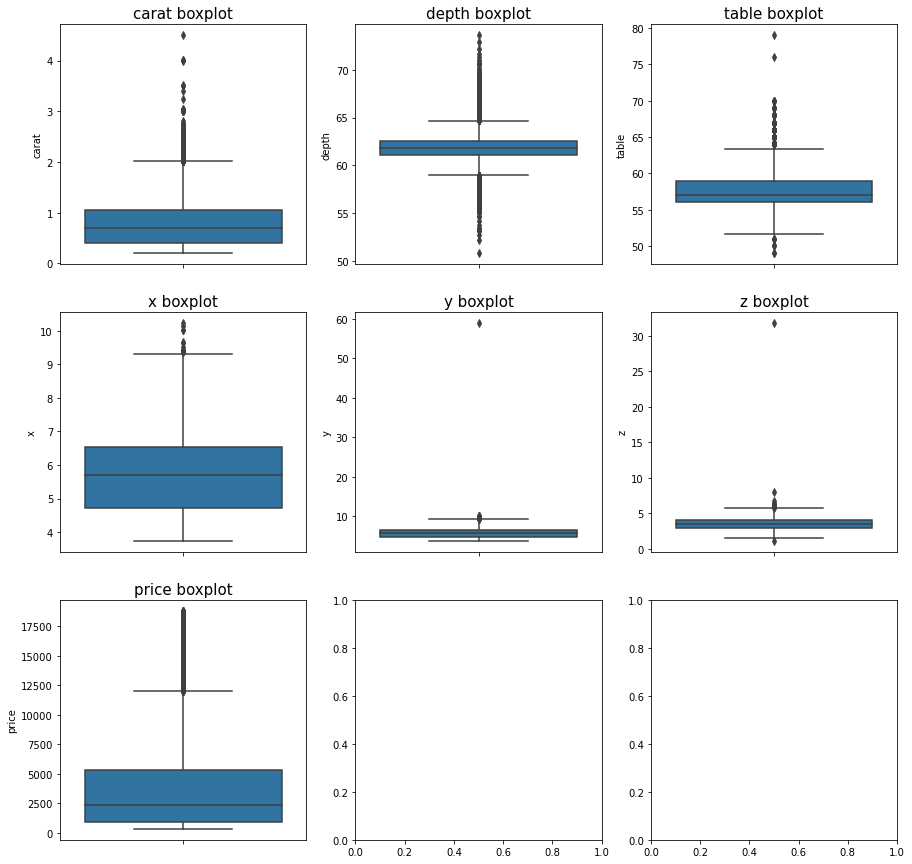

In [19]:
fig,axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,15)
a = sns.boxplot(data=df,x='carat',orient='v',ax=axes[0][0])
a.set_title('carat boxplot',fontsize=15);
b = sns.boxplot(data=df,x='depth',orient='v',ax=axes[0][1])
b.set_title('depth boxplot',fontsize=15);
c = sns.boxplot(data=df,x='table',orient='v',ax=axes[0][2])
c.set_title('table boxplot',fontsize=15);
d = sns.boxplot(data=df,x='x',orient='v',ax=axes[1][0])
d.set_title('x boxplot',fontsize=15);
e = sns.boxplot(data=df,x='y',orient='v',ax=axes[1][1])
e.set_title('y boxplot',fontsize=15);
f = sns.boxplot(data=df,x='z',orient='v',ax=axes[1][2])
f.set_title('z boxplot',fontsize=15);
g = sns.boxplot(data=df,x='price',orient='v',ax=axes[2][0])
g.set_title('price boxplot',fontsize=15);

In [20]:
distrubution = df.drop(['cut','color','clarity'],axis=1) 

In [21]:
distrubution.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


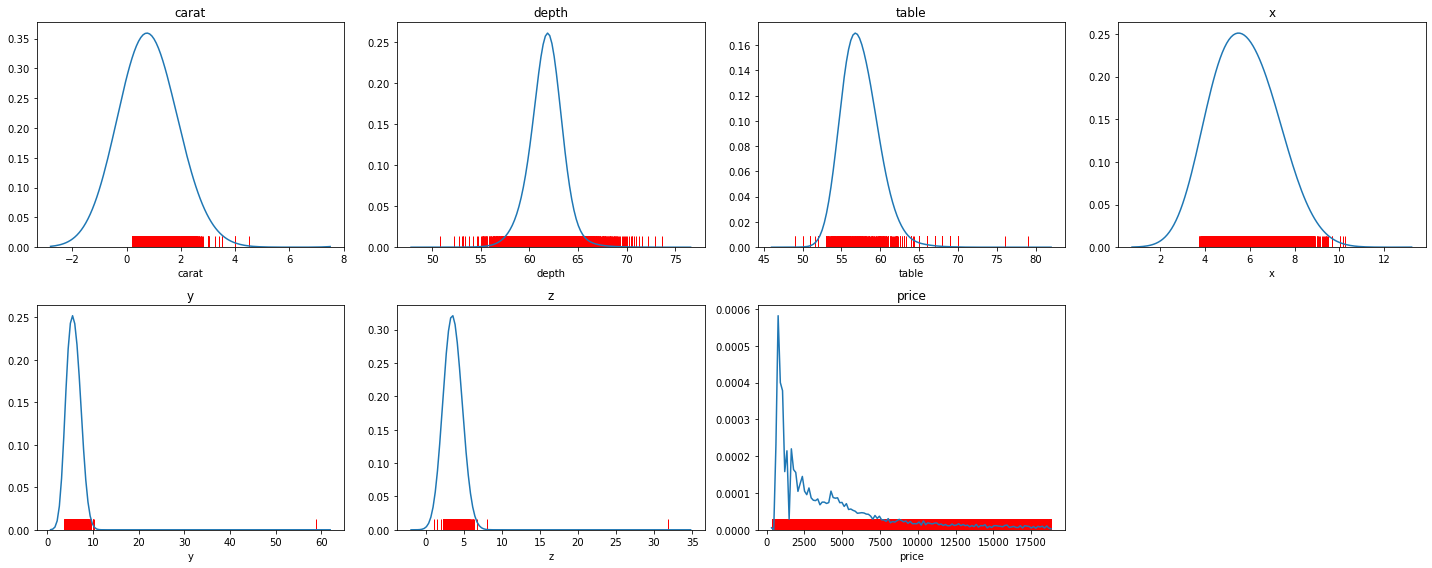

In [22]:
data_plot=distrubution
fig=plt.figure(figsize=(20,8))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False,rug=True,rug_kws={'color':'r'},kde_kws={'bw':1})
    ax.set_title(data_plot.columns[i],color='Black')
plt.tight_layout()
plt.show()

In [23]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head()

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.670000,5.640000,3.530000,949
6215,0.71,Good,F,SI2,64.1,60.0,5.729854,5.733569,3.538057,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.460000,4.430000,2.760000,854
8919,1.52,Good,E,I1,57.3,58.0,7.530000,7.420000,4.280000,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.580000,4.540000,2.800000,906


In [24]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Before (26967, 10)
After (26933, 10)
Number of duplicate rows = 0


In [25]:
corr = df.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.034772,0.181539,0.977897,0.942387,0.946331,0.922409
depth,0.034772,1.000000,-0.293713,-0.018394,-0.024389,0.097091,-0.002840
table,0.181539,-0.293713,1.000000,0.197466,0.183507,0.150955,0.126844
x,0.977897,-0.018394,0.197466,1.000000,0.962532,0.960693,0.887435
y,0.942387,-0.024389,0.183507,0.962532,1.000000,0.932700,0.857241
z,0.946331,0.097091,0.150955,0.960693,0.932700,1.000000,0.855314
price,0.922409,-0.002840,0.126844,0.887435,0.857241,0.855314,1.000000


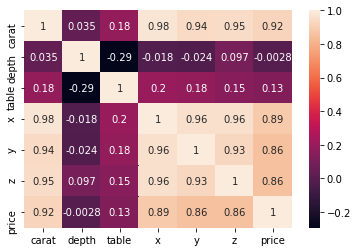

In [26]:
sns.heatmap(corr,annot=True); 

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
for column in df.columns:
    lr,ur=remove_outlier(df['table'])
    df['table']=np.where(df['table']>ur,ur,df['table'])
    df['table']=np.where(df['table']<lr,lr,df['table'])
    
    lr,ur=remove_outlier(df['carat'])
    df['carat']=np.where(df['carat']>ur,ur,df['carat'])
    df['carat']=np.where(df['carat']<lr,lr,df['carat'])
    
    lr,ur=remove_outlier(df['depth'])
    df['depth']=np.where(df['depth']>ur,ur,df['depth'])
    df['depth']=np.where(df['depth']<lr,lr,df['depth'])
    
    lr,ur=remove_outlier(df['x'])
    df['x']=np.where(df['x']>ur,ur,df['x'])
    df['x']=np.where(df['x']<lr,lr,df['x'])
    
    lr,ur=remove_outlier(df['y'])
    df['y']=np.where(df['y']>ur,ur,df['y'])
    df['y']=np.where(df['y']<lr,lr,df['y'])
    
    lr,ur=remove_outlier(df['z'])
    df['z']=np.where(df['z']>ur,ur,df['z'])
    df['z']=np.where(df['z']<lr,lr,df['z'])
    
    

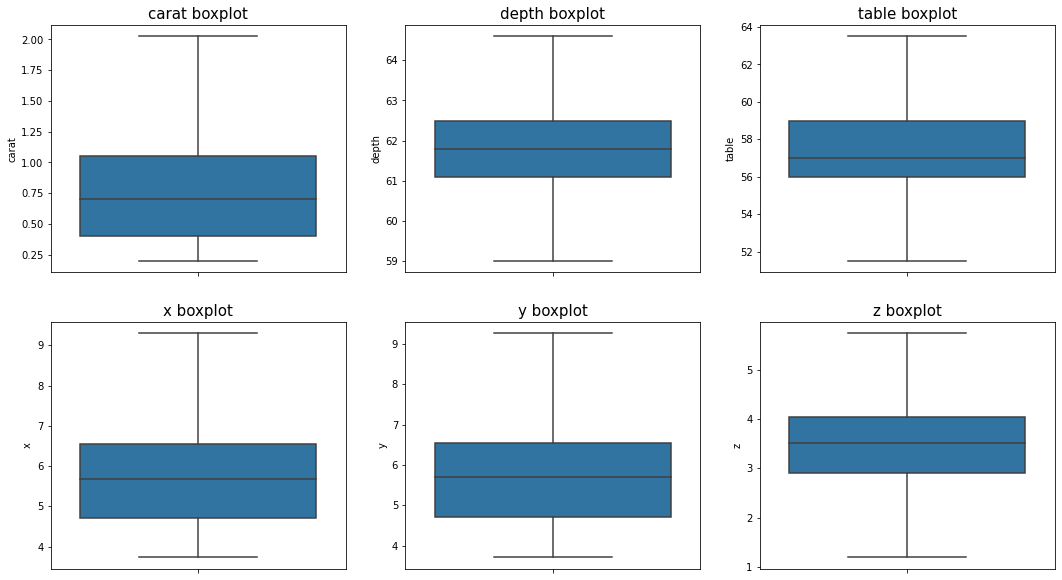

In [29]:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,10)
a = sns.boxplot(data=df,x='carat',orient='v',ax=axes[0][0])
a.set_title('carat boxplot',fontsize=15);
b = sns.boxplot(data=df,x='depth',orient='v',ax=axes[0][1])
b.set_title('depth boxplot',fontsize=15);
c = sns.boxplot(data=df,x='table',orient='v',ax=axes[0][2])
c.set_title('table boxplot',fontsize=15);
d = sns.boxplot(data=df,x='x',orient='v',ax=axes[1][0])
d.set_title('x boxplot',fontsize=15);
e = sns.boxplot(data=df,x='y',orient='v',ax=axes[1][1])
e.set_title('y boxplot',fontsize=15);
f = sns.boxplot(data=df,x='z',orient='v',ax=axes[1][2])
f.set_title('z boxplot',fontsize=15);
#g = sns.boxplot(data=df,x='price',orient='v',ax=axes[2][0])
#g.set_title('price boxplot',fontsize=15);


In [30]:
# we can see that the min values in the X,Y,Z are changed. 
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.793298,0.462127,0.20,0.40,0.70,1.05,2.025
depth,26933.0,61.750462,1.218530,59.00,61.10,61.80,62.50,64.600
table,26933.0,57.435544,2.157119,51.50,56.00,57.00,59.00,63.500
x,26933.0,5.729604,1.125704,3.73,4.71,5.69,6.55,9.310
y,26933.0,5.731529,1.117663,3.71,4.72,5.70,6.54,9.270
z,26933.0,3.537625,0.695577,1.19,2.90,3.52,4.04,5.750
price,26933.0,3937.526120,4022.551862,326.00,945.00,2375.00,5356.00,18818.000


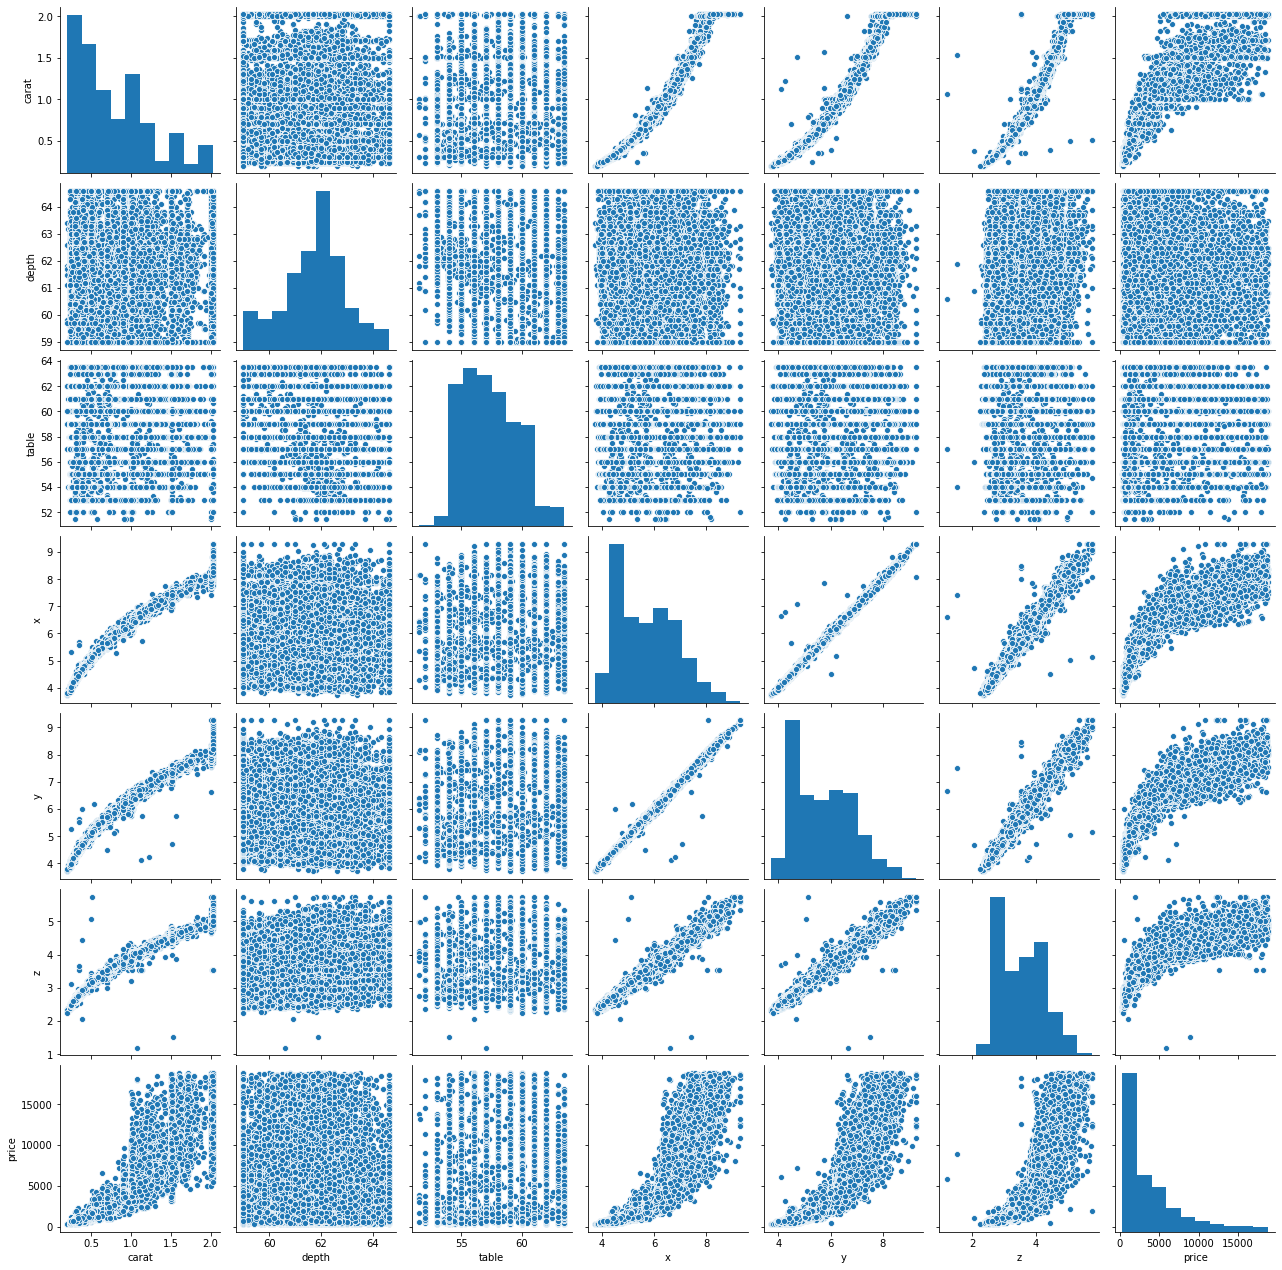

In [31]:
sns.pairplot(df)

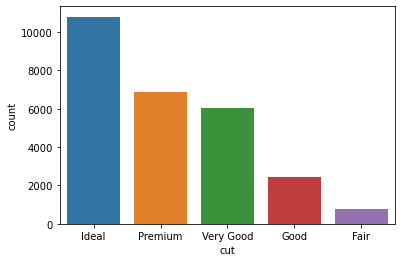

In [32]:
sns.countplot(df['cut']);

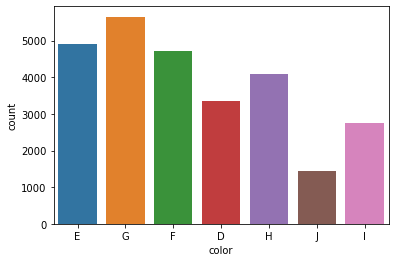

In [33]:
sns.countplot(df['color']);

<AxesSubplot:xlabel='cut', ylabel='count'>

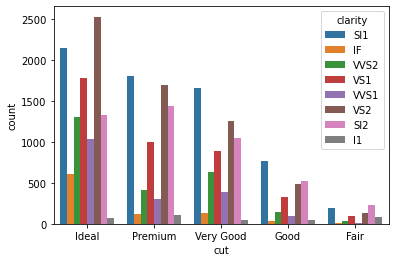

In [34]:
sns.countplot(df['cut'],hue=df['clarity']) 

In [35]:
df.clarity.value_counts(sort=True)
# clarity SI1 is the most number of sold ones and this is the almost lower range in the clarity. so most of the customers in this data
# are purchasing the lower calrity diamond. closely followed by VS2 which is slighhtly above the SI1 in clasrity. 

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

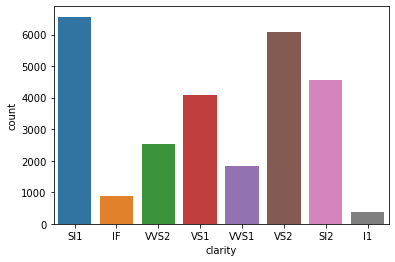

In [36]:
sns.countplot(df['clarity']);

<AxesSubplot:xlabel='price', ylabel='carat'>

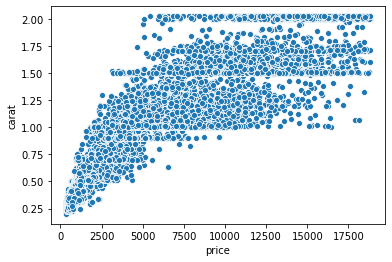

In [37]:
sns.scatterplot(df['price'],df['carat'])

<AxesSubplot:xlabel='price', ylabel='carat'>

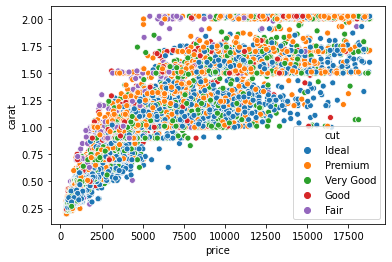

In [38]:
sns.scatterplot(data=df, x="price", y="carat", hue="cut")

<AxesSubplot:xlabel='price', ylabel='carat'>

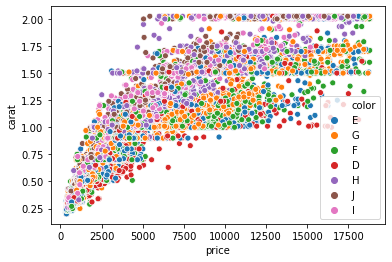

In [39]:
sns.scatterplot(data=df, x="price", y="carat", hue="color")

<AxesSubplot:xlabel='price', ylabel='carat'>

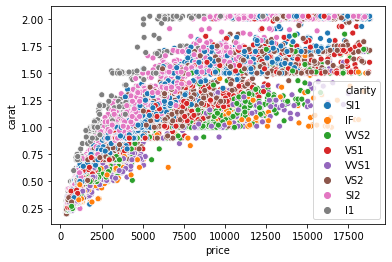

In [40]:
sns.scatterplot(data=df, x="price", y="carat", hue="clarity")

<AxesSubplot:xlabel='cut', ylabel='price'>

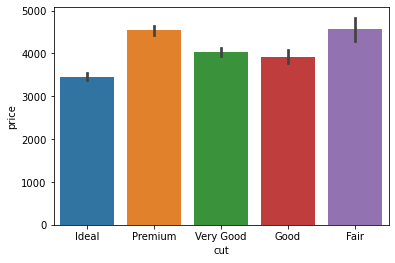

In [41]:
sns.barplot(df['cut'],df['price'])

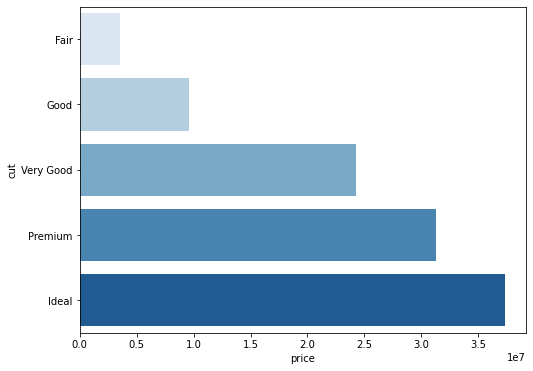

In [42]:
price = df['price'].groupby(df.cut).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(price.head(),price.head().index, palette='Blues') 

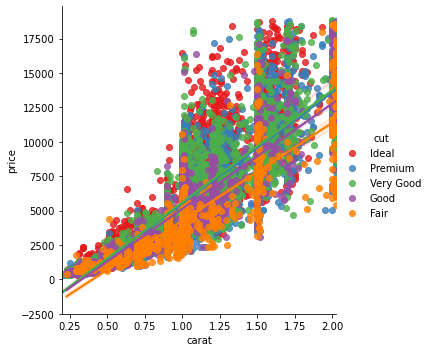

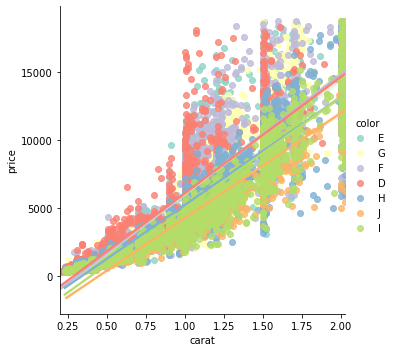

In [43]:
ax = sns.lmplot(x = 'carat', y = 'price', data=df, hue='cut', palette='Set1')
ax = sns.lmplot(x = 'carat', y = 'price', data=df, hue='color', palette='Set3')



In [44]:
df['log_price'] = np.log(df['price']) 

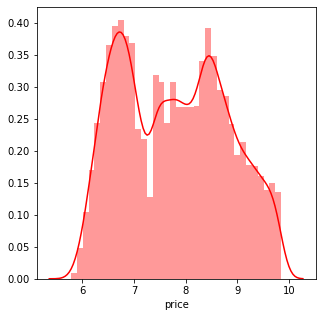

In [45]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.distplot(np.log(df['price']), kde = True, color = 'r' )

In [46]:
df.cut.value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [47]:
df.clarity.value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [48]:
df.cut.replace(['Ideal','Premium','Very Good','Good','Fair'],['4','3','2','1','0'],inplace=True) 

In [49]:
df.clarity.replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1',],['7','6','5','4','3','2','1','0'],inplace=True)

In [50]:
df.color.replace(['D','E','F','G','H','I','J'],['6','5','4','3','2','1','0'],inplace=True) 

In [51]:
df.dtypes

carat        float64
cut           object
color         object
clarity       object
depth        float64
table        float64
x            float64
y            float64
z            float64
price          int64
log_price    float64
dtype: object

In [52]:
df.cut.value_counts()

4    10805
3     6886
2     6027
1     2435
0      780
Name: cut, dtype: int64

In [53]:
df.clarity.value_counts()

2    6565
3    6093
1    4564
4    4087
5    2530
6    1839
7     891
0     364
Name: clarity, dtype: int64

In [54]:
df.drop(['price'],axis=1,inplace=True)

In [55]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: cut
[4, 3, 2, 1, 0]
Categories (5, object): [0, 1, 2, 3, 4]
[4 3 2 1 0]


feature: color
[5, 3, 4, 6, 2, 0, 1]
Categories (7, object): [0, 1, 2, 3, 4, 5, 6]
[5 3 4 6 2 0 1]


feature: clarity
[2, 7, 5, 4, 6, 3, 1, 0]
Categories (8, object): [0, 1, 2, 3, 4, 5, 6, 7]
[2 7 5 4 6 3 1 0]


In [56]:
df.dtypes

carat        float64
cut             int8
color           int8
clarity         int8
depth        float64
table        float64
x            float64
y            float64
z            float64
log_price    float64
dtype: object

In [57]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,log_price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,6.212606
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,6.891626
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,8.746557
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,6.986566
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,6.658011


In [58]:
X = df.drop(['log_price','x','y','z','depth'], axis=1)
y = df[['log_price']]

In [59]:
X.head()

,carat,cut,color,clarity,table
0,0.30,4,5,2,58.0
1,0.33,3,3,7,58.0
2,0.90,2,5,5,60.0
3,0.42,4,4,4,56.0
4,0.31,4,4,6,59.0


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
regression_model.coef_

array([[2.27890882, 0.02075491, 0.08698557, 0.09367815, 0.00439282]])

In [63]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 2.278908819818282
The coefficient for cut is 0.020754914236901522
The coefficient for color is 0.08698556649769076
The coefficient for clarity is 0.09367814964851032
The coefficient for table is 0.004392818092169052


In [64]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.08183383827831


In [65]:
# R SQUARE TRAINING
regression_model.score(X_train, y_train)

0.9056983256467672

In [66]:
# R SQUARE TESTING
regression_model.score(X_test, y_test)

0.9020937145663204

In [67]:
#RMSE ON TRAINING 
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.3126639336840749

In [68]:
# RMSE ON TESTING
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.3198579436377361

In [69]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,table,log_price
22114,0.34,2,2,3,60.0,6.285998
2275,0.30,4,5,3,55.0,6.738152
19183,0.50,4,3,2,57.0,7.122867
5030,1.10,1,5,1,56.0,8.310169
25414,1.02,3,4,1,62.0,8.308199


In [70]:
expr= 'log_price ~ carat + cut + color + clarity + table' 

In [71]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    5.081834
carat        2.278909
cut          0.020755
color        0.086986
clarity      0.093678
table        0.004393
dtype: float64

In [72]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 3.620e+04
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:45:42   Log-Likelihood:                -4832.3
No. Observations:               18853   AIC:                             9677.
Df Residuals:                   18847   BIC:                             9724.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0818      0.072     71.028      0.0

In [73]:
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [74]:
np.sqrt(mse)

0.31266393368407486

In [75]:
mse = np.mean((lm1.predict(data_test.drop('log_price',axis=1))-data_test['log_price'])**2)

In [76]:
np.sqrt(mse)

0.3198579436377362

In [77]:
y_pred = lm1.predict(data_test)


In [78]:
y_pred1 = lm1.predict(data_train)

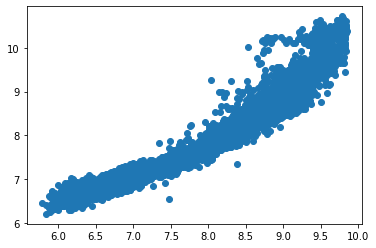

In [79]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [80]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(5.08) * Intercept + (2.28) * carat + (0.02) * cut + (0.09) * color + (0.09) * clarity + (0.0) * table + 

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [82]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 5.137477829549527
cut ---> 7.566364979444204
color ---> 5.503717592305423
clarity ---> 5.216895404021832
table ---> 23.949277079365615


In [83]:
y_pred #test

16997     8.562220
24457     7.975529
16612     9.260004
308       7.902932
26652    10.234550
           ...    
25016     6.999714
8485      8.395787
26891     8.068600
17455     8.044558
26169     8.097875
Length: 8080, dtype: float64

In [84]:
y_pred1 #train

22114    6.616747
2275     6.806093
19183    7.003012
5030     8.383992
25414    8.182561
           ...   
10962    6.984046
17304    7.385193
5193     8.654027
12179    8.406342
235      8.986080
Length: 18853, dtype: float64

In [85]:
df2 = df.copy() 

In [86]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,log_price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,6.212606
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,6.891626
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,8.746557
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,6.986566
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,6.658011


In [87]:
df2['y_pred_test'] = np.exp(y_pred)
df2['price'] = np.exp(df['log_price'])
df2['y_pred_train'] = np.exp(y_pred1)
df2.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,log_price,y_pred_test,price,y_pred_train
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,6.212606,833.466677,499.0,NaN
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,6.891626,NaN,984.0,1173.358804
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,8.746557,4193.325069,6289.0,NaN
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,6.986566,NaN,1082.0,1200.685446
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,6.658011,1141.961482,779.0,NaN
5,1.02,4,6,3,61.5,56.0,6.46,6.49,3.99,9.159258,NaN,9502.0,5106.584950
6,1.01,1,2,2,63.7,60.0,6.35,6.30,4.03,8.483843,3069.233633,4836.0,NaN
7,0.50,3,5,2,61.5,62.0,5.09,5.06,3.12,7.254885,1310.536461,1415.0,NaN
8,1.21,1,2,2,63.8,63.5,6.72,6.63,4.26,8.595450,NaN,5407.0,4916.439190
9,0.35,4,4,3,60.5,57.0,4.52,4.60,2.76,6.559615,NaN,706.0,936.209174
